## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv(r"C:\Users\FOLASADE\Downloads\fraud_insurance_claims.csv")

#### Show Top 5 Records

In [3]:
df.head()

,age,gender,incident_type,collision_type,incident_severity,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,police_report_available,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,46,FEMALE,Parked Car,Unknown,Minor Damage,Northbrook,5_hr,1,2,UNKNOWN,1440,Toyota,Corolla,Year_2004,0
1,43,MALE,Parked Car,Unknown,Minor Damage,Northbend,0_hr,1,3,YES,1440,Chevrolet,Tahoe,Year_2011,0
2,39,MALE,Parked Car,Unknown,Minor Damage,Northbend,5_hr,1,1,YES,1680,Ford,F150,Year_2009,0
3,57,MALE,Parked Car,Unknown,Minor Damage,Springfield,3_hr,1,3,UNKNOWN,1680,Volkswagen,Passat,Year_2000,0
4,33,MALE,Vehicle Theft,Unknown,Minor Damage,Arlington,3_hr,1,1,NO,1750,Toyota,Corolla,Year_2005,0


#### Preparing X and Y variables

In [4]:
X = df.drop(columns=['fraud_reported'],axis=1)

In [5]:
X.head()

,age,gender,incident_type,collision_type,incident_severity,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,police_report_available,vehicle_claim,auto_make,auto_model,auto_year
0,46,FEMALE,Parked Car,Unknown,Minor Damage,Northbrook,5_hr,1,2,UNKNOWN,1440,Toyota,Corolla,Year_2004
1,43,MALE,Parked Car,Unknown,Minor Damage,Northbend,0_hr,1,3,YES,1440,Chevrolet,Tahoe,Year_2011
2,39,MALE,Parked Car,Unknown,Minor Damage,Northbend,5_hr,1,1,YES,1680,Ford,F150,Year_2009
3,57,MALE,Parked Car,Unknown,Minor Damage,Springfield,3_hr,1,3,UNKNOWN,1680,Volkswagen,Passat,Year_2000
4,33,MALE,Vehicle Theft,Unknown,Minor Damage,Arlington,3_hr,1,1,NO,1750,Toyota,Corolla,Year_2005


In [6]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in'incident_type' variable:",end=" " )
print(df['incident_type'].unique())

print("Categories in 'collision_type' variable:     ",end=" " )
print(df['collision_type'].unique())

print("Categories in 'incident_severity' variable:     ",end=" " )
print(df['incident_severity'].unique())

print("Categories in 'incident_city' variable:     ",end=" " )
print(df['incident_city'].unique())

print("Categories in 'incident_hour_of_the_day' variable:     ",end=" " )
print(df['incident_hour_of_the_day'].unique())

print("Categories in 'police_report_available' variable:     ",end=" " )
print(df['police_report_available'].unique())

print("Categories in 'auto_make' variable:     ",end=" " )
print(df['auto_make'].unique())

print("Categories in 'auto_model' variable:     ",end=" " )
print(df['auto_model'].unique())

print("Categories in 'auto_year' variable:     ",end=" " )
print(df['auto_year'].unique())

Categories in 'gender' variable:      ['FEMALE' 'MALE']
Categories in'incident_type' variable: ['Parked Car' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Single Vehicle Collision']
Categories in 'collision_type' variable:      ['Unknown' 'Rear Collision' 'Front Collision' 'Side Collision']
Categories in 'incident_severity' variable:      ['Minor Damage' 'Trivial Damage' 'Total Loss' 'Major Damage']
Categories in 'incident_city' variable:      ['Northbrook' 'Northbend' 'Springfield' 'Arlington' 'Riverwood' 'Columbus'
 'Hillsdale']
Categories in 'incident_hour_of_the_day' variable:      ['5_hr' '0_hr' '3_hr' '22_hr' '19_hr' '7_hr' '9_hr' '6_hr' '4_hr' '8_hr'
 '21_hr' '13_hr' '20_hr' '16_hr' '17_hr' '10_hr' '1_hr' '14_hr' '23_hr'
 '2_hr' '12_hr' '18_hr' '15_hr' '11_hr']
Categories in 'police_report_available' variable:      ['UNKNOWN' 'YES' 'NO']
Categories in 'auto_make' variable:      ['Toyota' 'Chevrolet' 'Ford' 'Volkswagen' 'Honda' 'BMW' 'Nissan' 'Jeep'
 'Audi' 'Suburu' 'Saab' 'Mercede

In [7]:
y = df['fraud_reported']

In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    0
997    0
998    1
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 126)

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 126), (200, 126))

#### Create an Evaluate Function to give all metrics after model Training

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3399
- Mean Absolute Error: 0.2522
- R2 Score: 0.3645
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4347
- Mean Absolute Error: 0.3262
- R2 Score: 0.0626


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4263
- Mean Absolute Error: 0.3635
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4509
- Mean Absolute Error: 0.3850
- R2 Score: -0.0084


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3399
- Mean Absolute Error: 0.2518
- R2 Score: 0.3643
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4321
- Mean Absolute Error: 0.3241
- R2 Score: 0.0738


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3434
- Mean Absolute Error: 0.2538
- R2 Score: 0.3510
----------------------

### Results

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
8,AdaBoost Regressor,0.187075
5,Random Forest Regressor,0.105620
2,Ridge,0.073849
0,Linear Regression,0.062594
7,CatBoosting Regressor,-0.006601
1,Lasso,-0.008440
3,K-Neighbors Regressor,-0.017857
6,XGBRegressor,-0.047030
4,Decision Tree,-0.512897


## AdaBoost Regressor

In [16]:
boost_model = AdaBoostRegressor()
boost_model = boost_model.fit(X_train, y_train)
y_pred = boost_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 17.43


## Plot y_pred and y_test

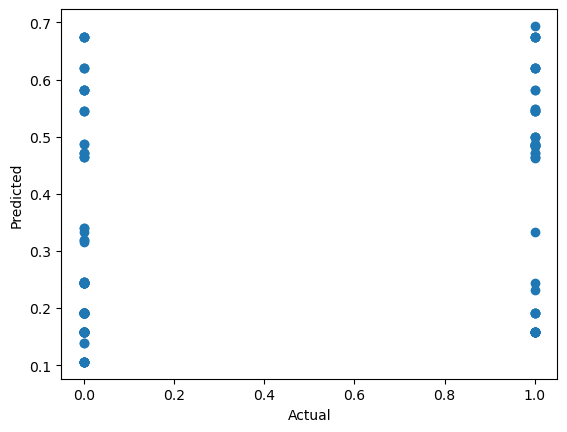

In [17]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

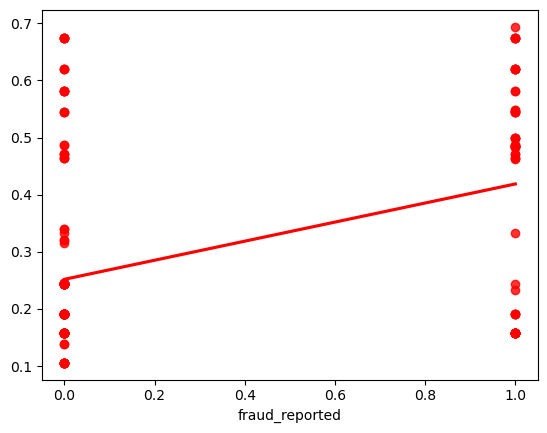

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [19]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,0,0.486486,-0.486486
737,1,0.545455,0.454545
740,1,0.157895,0.842105
660,0,0.244499,-0.244499
411,1,0.675000,0.325000
...,...,...,...
408,1,0.500000,0.500000
332,1,0.157895,0.842105
208,0,0.190661,-0.190661
613,1,0.620853,0.379147
